<a href="https://colab.research.google.com/github/karandoshi1810/Machine-Learning/blob/main/K_Means_CLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Required libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
#To import datafiles from Google Drive
from google.colab import drive

In [ ]:
#To mount the drive data into colab cloud and enter the activation code
#4/1AY0e-g4UIdh51GMQrW4voFdq4EfqV0GfhKX-Fbnk1cHN4l6ZVJCsaLaMybY
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/K-Means Clustering"

/content/drive/My Drive/Colab Notebooks/K-Means Clustering


In [ ]:
#reading data from drive uing pandas library
df=pd.read_excel("kmean.xlsx",sheet_name='ex7data2_X',header=None)
print(df)
dataset.shape

            0         1
0    1.842080  4.607572
1    5.658583  4.799964
2    6.352579  3.290854
3    2.904017  4.612204
4    3.231979  4.939894
..        ...       ...
295  7.302787  3.380160
296  6.991984  2.987067
297  4.825534  2.779617
298  6.117681  2.854757
299  0.940489  5.715568

[300 rows x 2 columns]


(300, 2)

In [ ]:
df.head()


,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


In [ ]:
x=np.array(df)
x

In [ ]:
import random
init_centroids = random.sample(range(0,len(df)),3)
init_centroids #index positions

[243, 153, 203]

In [ ]:
centroids = []
for i in init_centroids:
  centroids.append(df.iloc[i])
centroids
centroids = np.array(centroids)
centroids

array([[7.17135204, 3.4122727 ],
       [2.95818429, 1.01887096],
       [5.64034678, 2.69385282]])

In [ ]:
#Measuring distances of all datapoints from all centroids
def calc_distance(X1,X2):
  return (((sum(X1-X2)**2)))**0.5

In [ ]:
def findClosestCentroid(c,X):
  assign_centroid=[]
  for i in X:
    distance=[]
    for j in c:
      distance.append(calc_distance(i,j))#calling function distance and appending distance to distance matrix
    assign_centroid.append(np.argmin(distance))
  return assign_centroid

In [ ]:
get_centroid=findClosestCentroid(centroids,x)

In [ ]:
def calc_centroids(cluster,x):
  new_centroid=[]
  new_df1=pd.concat([pd.DataFrame(x),pd.DataFrame(cluster,columns=['cluster'])],axis=1)
  for c in set(new_df1['cluster']):
    current_cluster=new_df1[new_df1['cluster']==c][new_df1.columns[:-1]]  #considering all x and y values for a particular 'c'
    current_mean = current_cluster.mean(axis=0)
    new_centroid.append(current_mean)
  return new_centroid


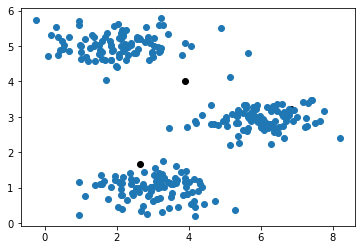

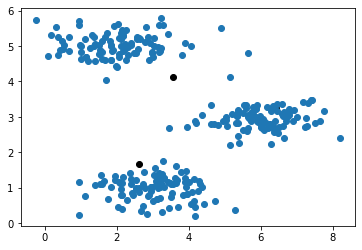

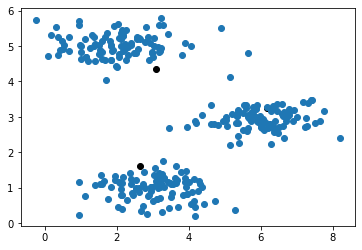

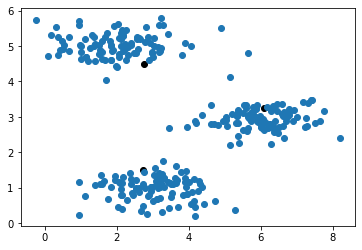

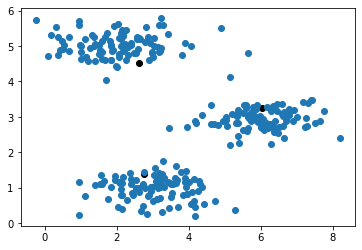

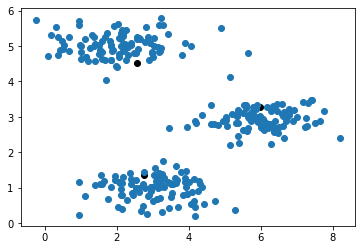

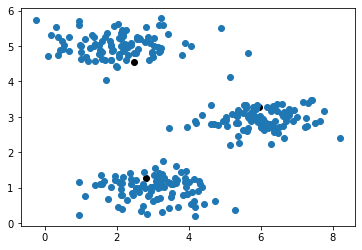

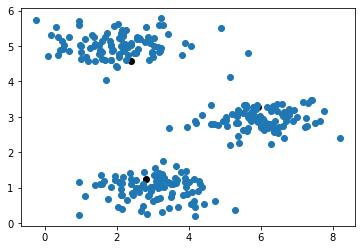

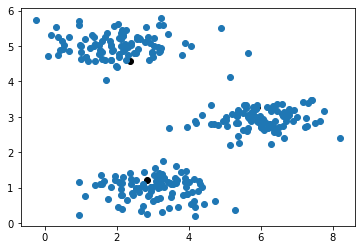

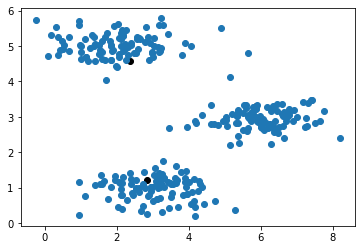

In [ ]:
for i in range(10):
  get_centroid=findClosestCentroid(centroids,x)
  centroids=calc_centroids(get_centroid,x)
  #visualize
  plt.figure()
  plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1],color='black') #centroid point
  plt.scatter(x[:,0],x[:,1],alpha=1)
  plt.show()

In [ ]:
import cv2
im=cv2.imread('Talking Tom.jpg')
im.shape

(200, 200, 3)

In [ ]:
im = (im/255).reshape(200*200*3)
init_centroids=random.sample(range(0,len(im)),10)
init_centroids

[117853, 83740, 13190, 104860, 92499, 85812, 56600, 78155, 72233, 38338]

In [ ]:
centroids=[]
for i in init_centroids:
  centroids.append(im[i])
  

In [ ]:
for i in range(15):
  get_centroids=findClosestCentroid(centroids,im[i])
  centroids=calc_centroids(get_centroids,im[i])

TypeError: ignored